In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import pandas as pd

# df = pd.read_csv("../input/twitter-data-fromapi/label1.csv")
# # Load RoBERTa tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
# model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

# # Define mapping of emotion labels to their names
# emotion_map = {
# 	0: 'anger',
# 	1: 'joy',
# 	2: 'optimism',
# 	3: 'sadness'
# }


# # # Define function to predict emotions for a list of tweets
# # def predict_emotions(tweets):
# # 	# Tokenize tweets
# # 	tokenized_tweets = tokenizer.batch_encode_plus(tweets, padding=True, truncation=True, return_tensors='pt')

# # 	# Pass tokenized tweets through RoBERTa model
# # 	logits = model(**tokenized_tweets)[0]

# # 	# Convert logits to probabilities using softmax
# # 	probabilities = torch.softmax(logits, dim=1)

# # 	# Get predicted emotion label for each tweet
# # 	predicted_labels = torch.argmax(probabilities, dim=1)

# # 	# Map predicted label indices to their emotion names
# # 	predicted_emotions = [emotion_map[label.item()] for label in predicted_labels]

# # 	return predicted_emotions


# # # Predict emotions for a list of tweets
# # tweets = df["clean_tweets"].tolist()
# # predicted_emotions = predict_emotions(tweets)
# # df["predicted_emotions"] = predicted_emotions
# # print(df["predicted_emotions"].value_counts())
# # df.to_csv("label3.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install transformers -q

In [ ]:
import os
import numpy as np
import math
import time
from sklearn import preprocessing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
import pandas as pd
import os

# df = pd.read_csv("../input/twitter-data-fromapi/label3.csv", index_col=0)
df = pd.read_csv("/content/drive/Othercomputers/Advait Laptop/Programming_backed/pythonProject/twitter/label3.csv", index_col = 0)
df = df.head(4000)
df.columns

Index(['Url', 'Lang', 'tweet', 'MediaUrl', 'clean_tweets', 'polarity',
       'emotion', 'hate_speech'],
      dtype='object')

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from textblob import TextBlob

# # Text to translate
# text = 'My name is Joker, I am playing football.'

# # Create a TextBlob object for the text
# blob = TextBlob(text)

# # Translate the text to Hinglish
# result = blob.translate(to='hi')

# # Convert the Hinglish output to Latin script
# result_latin = result.translate(to='en')

# # Print the translated text in Hinglish in Latin script
# print(result_latin)


In [ ]:
# from transformers import pipeline, RobertaTokenizerFast, TFRobertaForSequenceClassification

# # emotion = pipeline("sentiment-analysis",model="arpanghoshal/EmoRoBERTa")
# tokernzier = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [ ]:
le_senti = preprocessing.LabelEncoder()
# le_polarity.fit(df["polarity"])
df["polarity_le"] = le_senti.fit_transform(df["polarity"])
df.columns

Index(['Url', 'Lang', 'tweet', 'MediaUrl', 'clean_tweets', 'polarity',
       'emotion', 'hate_speech', 'polarity_le'],
      dtype='object')

In [ ]:
# le_hate = preprocessing.LabelEncoder()
# df["hate_le"] = le_hate.fit_transform(df["hate_le"])
# df.columns

In [ ]:
# def encode_dict(row):
#     le_emo = preprocessing.LabelEncoder()
#     encoded_dict = {}
#     for key, value in row.items():
#         encoded_dict[key] = le_emo.fit_transform([value])[0]
#     return encoded_dict

# df['le_emotions'] = df['emotion'].apply(encode_dict)
# df
import ast
def dict_to_df(s):
    d = ast.literal_eval(s)
    df = pd.DataFrame.from_dict(d, orient='index', columns=['value'])
    return df.transpose()

df_emotions = pd.concat([dict_to_df(s) for s in df['emotion'].values])
df_emotions.index = range(len(df_emotions))
print(len(df_emotions))
print(df_emotions.head(5))
print(df_emotions.columns)

4000
   Happy  Angry  Surprise  Sad  Fear
0    0.0    0.0      1.00  0.0  0.00
1    0.0    0.0      0.00  0.0  1.00
2    0.0    0.0      0.00  0.0  1.00
3    0.0    0.0      0.33  0.0  0.67
4    0.0    0.0      0.00  0.0  0.00
Index(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'], dtype='object')


In [ ]:
# df_emotions.drop(columns=["index"], inplace=True, axis=1)
# # df_result = pd.concat([df, df_emotions], axis=1, join="inner",ignore_index=False)
df_result = pd.concat([df, df_emotions], join="inner", axis=1)
len(df_result)
df_result.drop(columns=["emotion"], inplace=True)
df_result['emotion'] = df_result.apply(lambda row: [row["Happy"], row['Angry'], row['Surprise'], row["Sad"],row['Fear']], axis=1)
# df_result.drop(columns=['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'], inplace=True)
df_result.head(5)

,Url,Lang,tweet,MediaUrl,clean_tweets,polarity,hate_speech,polarity_le,Happy,Angry,Surprise,Sad,Fear,emotion
0,https://twitter.com/Militarylandnet/status/164...,en,📷Ukrainian President Zelensky visited Ukrainia...,https://pbs.twimg.com/media/FsUxOJBWIAoVEpj?fo...,ukrainian president zelensky visited ukrainian...,Neutral,0,1,0.0,0.0,1.00,0.0,0.00,"[0.0, 0.0, 1.0, 0.0, 0.0]"
1,https://twitter.com/StupidSingapore/status/164...,en,youtube.com/watch?v=WBesSn…\n\nDespicable #Ukr...,https://pbs.twimg.com/media/FsUxt2_aAAAV1GS?fo...,youtubewatch v wbessn despicable tank take cov...,Negative,0,0,0.0,0.0,0.00,0.0,1.00,"[0.0, 0.0, 0.0, 0.0, 1.0]"
2,https://twitter.com/findfreedom360/status/1640...,en,Drawing process update...📢\n\nLatest portrait ...,https://pbs.twimg.com/media/FsUw1ivaEAAEYC8?fo...,drawing process update latest portrait ukraine...,Positive,0,2,0.0,0.0,0.00,0.0,1.00,"[0.0, 0.0, 0.0, 0.0, 1.0]"
3,https://twitter.com/Orhan583441/status/1640769...,en,❗️A militant of the special forces unit Stepan...,https://pbs.twimg.com/media/FsUvmARWIAU4KX1?fo...,militant special force unit stepan kurilo liqu...,Positive,0,2,0.0,0.0,0.33,0.0,0.67,"[0.0, 0.0, 0.33, 0.0, 0.67]"
4,https://twitter.com/TrueMythocracy/status/1640...,en,@ShermanPotter51 @w85785410 So much has change...,https://pbs.twimg.com/media/FsUtsp1XgBYzWOq?fo...,much changed since feb 2022 anyone remember de...,Neutral,0,1,0.0,0.0,0.00,0.0,0.00,"[0.0, 0.0, 0.0, 0.0, 0.0]"


In [ ]:
# .to_numpy()
np.array([np.array(x).astype(float) for x in df_result['emotion']])

array([[0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.12, 0.12, 0.38, 0.38],
       [0.  , 0.  , 0.  , 0.4 , 0.6 ],
       [0.  , 0.  , 0.  , 0.62, 0.38]])

In [ ]:
df_result['Happy']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
3995    0.33
3996    0.00
3997    0.00
3998    0.00
3999    0.00
Name: Happy, Length: 4000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = df_result['clean_tweets'].values
y = df_result[['polarity_le',"emotion","hate_speech"]].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200,), (800,), (3200, 3), (800, 3))

In [ ]:
y_train[:5,2]

array([0, 0, 0, 0, 0], dtype=object)

In [ ]:
def get_tot_words(array):
    text = " ".join(array)
    return len(set(text.split()))
# train_samples
tot_words = get_tot_words(X_train)
tot_words

11030

In [ ]:
vectorizer = TextVectorization(max_tokens = None, output_sequence_length = 105)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

**TRANING MODEL**

In [ ]:
# glove_file = '../input/glove6b200d'
glove_file = "/content/drive/Othercomputers/Advait Laptop/Programming_backed/pythonProject/twitter/glove_file" 
path_to_glove_file = os.path.join(glove_file, "glove.6B.200d.txt")
embeddings_index = {}
with open(path_to_glove_file, encoding = "utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit = 1)
        coefs = np.fromstring(coefs, "f", sep = " ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare Embedding Matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be zeroes.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 8228 words (2804 misses)


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# class ConcatLayer(layers.Layer):
#     def __init__(self, **kwargs):
#         super(ConcatLayer, self).__init__(**kwargs)

#     def call(self, inputs):
#         return tf.concat(inputs, axis=-1)

# sentence_input = keras.Input(shape=(None,), dtype="int64", name='sentence_input')
# embedded_sentence = embedding_layer(sentence_input)
# x = layers.Bidirectional(layers.LSTM(len(X_train)//4, return_sequences=True, dropout=0.50, recurrent_dropout=0.25, name="LSTM_1"), name="bi_1")(embedded_sentence)
# x = ConcatLayer()([x, x])
# senti_branch = layers.TimeDistributed(layers.Dense(3, activation='softmax', name="senti_dense"), name='senti_output')(x)
# emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation='sigmoid', name="emo_dense"), name='emo_out')(x)

# model = keras.Model(inputs=sentence_input, outputs=[senti_branch, emot_branch], name="model_1")


In [ ]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# # # Create a tokenizer object
# # tokenizer = Tokenizer()

# # # Fit the tokenizer on your training data
# # tokenizer.fit_on_texts(X_train)
# tokenizer = Tokenizer(num_words=vocab_size)
# vocab_size = len(tokenizer.word_index) + 1

# embedding_layer = layers.Embedding(
#     num_tokens,
#     embedding_dim,
#     embeddings_initializer = keras.initializers.Constant(embedding_matrix),
#     trainable = False)

In [ ]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable = False)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# define the inputs and embedding layer
sentence_input = keras.Input(shape=(None,), dtype="int64", name='sentence_input')
# embedding_layer = layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False, name = 'embed_layer')
embedded_sentence = embedding_layer(sentence_input)

# define the model architecture
x = layers.Bidirectional(layers.LSTM(len(X_train)//2, return_sequences=True, dropout=0.50, recurrent_dropout=0.25, name="LSTM_1"), name="bi_1")(embedded_sentence)
senti_branch = layers.TimeDistributed(layers.Dense(3, activation='softmax', name="senti_dense"), name='senti_output')(x)
emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation='sigmoid', name="emo_dense"), name='emo_out')(x)
hate_branch = layers.TimeDistributed(layers.Dense(2, activation = 'sigmoid', name = "hate_dense"), name = 'hate_out')(x)

# define the custom layer
class CustomLayer(keras.layers.Layer):
    def __init__(self, units=64, activation=None, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel',
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True)

        super(CustomLayer, self).build(input_shape)

    def call(self, inputs):
        output = keras.backend.dot(inputs, self.kernel)
        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


# use the custom layer on the symbolic input/output
# custom_layer = CustomLayer(name="custom_layer")(embedded_sentence)

# define the model and compile it


In [ ]:
model = keras.Model(inputs=sentence_input,
                    outputs=[senti_branch, emot_branch, hate_branch], 
                    name="model_1",)
# model.compile(optimizer='adam', loss=['categorical_crossentropy', 'binary_crossentropy', 'mse'])

# print the summary of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sentence_input (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 200)    2206800     ['sentence_input[0][0]']         
                                                                                                  
 bi_1 (Bidirectional)           (None, None, 3200)   23052800    ['embedding[0][0]']              
                                                                                                  
 senti_output (TimeDistributed)  (None, None, 3)     9603        ['bi_1[0][0]']                   
                                                                                            

In [ ]:
# sentence_input = keras.Input(shape = (None, ), dtype = "int64", name = 'sentence_input')
# embedded_sentence = embedding_layer(sentence_input)
# x = layers.Bidirectional(layers.LSTM(len(X_train)//2, return_sequences = True, dropout = 0.50, recurrent_dropout = 0.25, name = "LSTM_1"), name = "bi_1")(embedded_sentence)
# senti_branch = layers.TimeDistributed(layers.Dense(3, activation = 'softmax', name = "senti_dense"), name = 'senti_output')(x)
# emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation = 'sigmoid', name = "emo_dense"), name = 'emo_out')(x)
# # hate_branch = layers.TimeDistributed(layers.Dense(len(), activation = 'softmax', name = "hate_dense"), name = 'hate_output')(x)

# model = keras.Model(inputs = sentence_input, outputs = [senti_branch, emot_branch], name = "model_1")
# model.summary()


In [ ]:
# import torch
# import torch.nn as nn

# class BidirectionalLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, dropout):
#         super(BidirectionalLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, dropout=dropout, batch_first=True)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         return out

# class ConcatLayer(nn.Module):
#     def __init__(self):
#         super(ConcatLayer, self).__init__()

#     def forward(self, x):
#         return torch.cat(x, dim=-1)

# class Model(nn.Module):
#     def __init__(self, embedding_matrix, num_classes):
#         super(Model, self).__init__()
#         self.embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
#         self.lstm = BidirectionalLSTM(input_size=embedding_matrix.shape[1], hidden_size=embedding_matrix.shape[1]//2, num_layers=1, dropout=0.5)
#         self.concat_layer = ConcatLayer()
#         self.senti_branch = nn.Sequential(nn.Linear(embedding_matrix.shape[1], 3), nn.Softmax(dim=-1))
#         self.emot_branch = nn.Sequential(nn.Linear(embedding_matrix.shape[1]*2, len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'])), nn.Sigmoid())

#     def forward(self, x):
#         embedded_sentence = self.embedding_layer(x)
#         lstm_out = self.lstm(embedded_sentence)
#         lstm_out_concat = self.concat_layer([lstm_out, lstm_out])
#         senti_out = self.senti_branch(lstm_out)
#         emot_out = self.emot_branch(lstm_out_concat)
#         return senti_out, emot_out
# model = Model(, (3,5))
# senti_out, emot_out = model(x_input)

In [ ]:
# import torch.optim as optim

# criterion_senti = nn.BCELoss()
# criterion_emot = nn.BCELoss()
# optimizer = optim.Adam(model.parameters())

# # During training:
# senti_out, emot_out = model(input_tensor)
# loss_senti = criterion_senti(senti_out, y1_in)
# loss_emot = criterion_emot(emot_out, y2_in)
# loss = loss_senti + loss_emot
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()


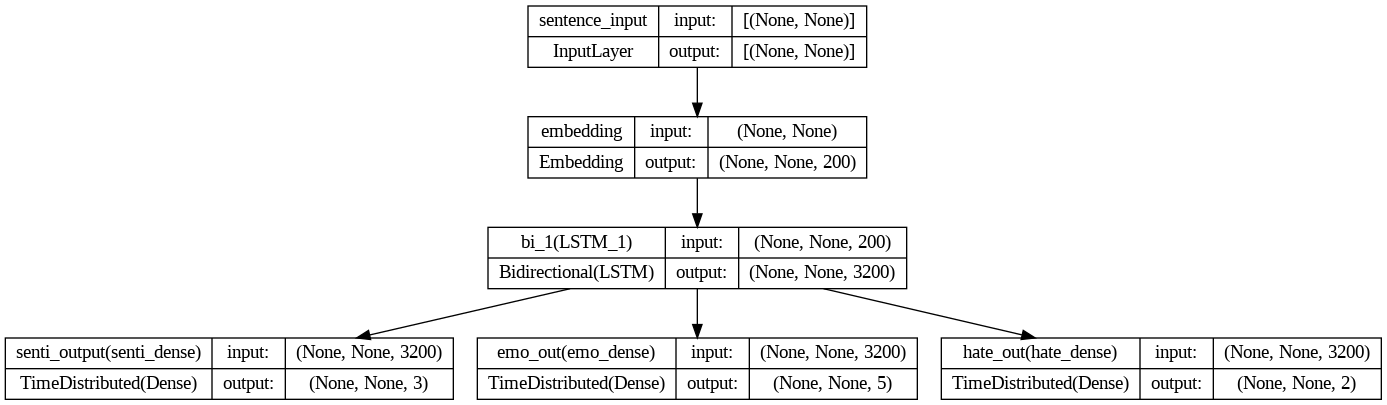

In [ ]:
tf.keras.utils.plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
# # opt = keras.optimizers.RMSprop(lr = 1e-3)
# model.compile(optimizer='adam',
#               loss = {'senti_output': 'binary_crossentropy', 'emo_out': 'binary_crossentropy'},
#               metrics=['accuracy']
#               )

In [ ]:
y_train[:, 0]

array([2, 2, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
np.array([np.array(x).astype(float) for x in y_train[:, 1]])

array([[0.5 , 0.  , 0.  , 0.  , 0.5 ],
       [0.  , 0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.5 ],
       [0.  , 0.17, 0.  , 0.5 , 0.33]])

In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 641518180464418141
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8340949675969427045
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# x_in = tf.convert_to_tensor(X_train)
# x_in = np.expand_dims(x_in, axis=1)
# X_train = X_train.astype(np.float32)
# y_train = y_train.astype(np.float32)
# x_in = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=-1)
# dims = [d for d in x_in.shape.as_list() if d is not None]
# new_shape = tf.TensorShape(dims)
# x_input = tf.reshape(x_in, new_shape)
# x_in = tf.constant(X_train)
# x_input = tf.expand_dims(x_in, axis=1)
x_input = vectorizer(np.array([[s] for s in X_train]))
y1_in = tf.one_hot(y_train[:, 0], depth=3)
y1_in = tf.expand_dims(y1_in, axis=1)
y1_in = tf.repeat(y1_in, repeats=105, axis=1)  # repeat along the second axis
y1_in = tf.reshape(y1_in, shape=(-1, 105, 3))  # reshape to match x_input
# y1_in = tf.reshape(y1_in, [9609, 105, 3])
y2_in = tf.expand_dims(tf.convert_to_tensor(np.array([np.array(x).astype(float) for x in y_train[:, 1]])), axis=1)
y3_in = tf.one_hot(y_train[:, 2], depth=2)
y3_in = tf.expand_dims(y3_in, axis=1)
y3_in = tf.repeat(y3_in, repeats=105, axis=1)  # repeat along the second axis
y3_in = tf.reshape(y3_in, shape=(-1, 105, 2))  # reshape to match x_input


x_input.shape, y1_in.shape, y2_in.shape, y3_in.shape

(TensorShape([3200, 105]),
 TensorShape([3200, 105, 3]),
 TensorShape([3200, 1, 5]),
 TensorShape([3200, 105, 2]))

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(X_train)
# max_length = max(len(sentence) for sentence in X_train)
# print(max_length)
# # Convert the sentences to sequences of integers
# X_train_seq = tokenizer.texts_to_sequences(X_train)

# # Pad the sequences to a fixed length
# X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_length)

# # Convert the sequences to a numpy array of integers
# # x_input = np.array(X_train_seq_padded)
# x_input.shape

In [ ]:
model.compile(optimizer='adam',
              loss={'senti_output': 'categorical_crossentropy', 'emo_out': 'binary_crossentropy','hate_out': 'binary_crossentropy'},
              metrics=['accuracy'])
              # metrics=['accuracy'])
# senti_reshaped = layers.Reshape((None, 3), name='senti_reshaped')(senti_branch)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path =  '/content/drive/Othercomputers/Advait Laptop/Programming_backed/pythonProject/twitter/saved model/model.ckpt'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch')

In [ ]:
model.fit(x = x_input,
          y = {'senti_output': y1_in, 'emo_out': y2_in, "hate_out":y3_in},
          epochs = 2,
          batch_size = 4,
          verbose = 1,
         )

Epoch 1/2
800/800 [==============================] - 718s 884ms/step - loss: 2.0119 - senti_output_loss: 1.1160 - emo_out_loss: 0.4093 - hate_out_loss: 0.4867 - senti_output_accuracy: 0.3748 - emo_out_accuracy: 0.4041 - hate_out_accuracy: 0.8131
Epoch 2/2
800/800 [==============================] - 706s 882ms/step - loss: 1.9406 - senti_output_loss: 1.0867 - emo_out_loss: 0.4008 - hate_out_loss: 0.4530 - senti_output_accuracy: 0.4089 - emo_out_accuracy: 0.4076 - hate_out_accuracy: 0.8168


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

def convert_tf(text):
    X_train = [text]
    return vectorizer(np.array([[s] for s in X_train]))

# x = convert_tf("white house u seen indication putin getting closer use tactical nuclear weapon")
x = convert_tf("elected member lok sabha last 4 term mandate people owe happy memory time spent 12 tughlak lane without prejudice right course abide detail contained letter lok sabha")
# x = convert_tf("recession granular sector badly affected others continue thrive")
m = model.predict(x)
print(x)

1/1 [==============================] - 0s 171ms/step
tf.Tensor(
[[ 3875   546  7237  3201    90    81   397  7158    32     1   359  2466
     30  1335   345     1     1   279     1    92   342 10440   804     1
   3553  7237  3201     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0]], shape=(1, 105), dtype=int64)


In [ ]:
m1 = m[:1]
m2 = m[1:2]
m3 = m[2:]
# print(m3)
for i in m3:
  for j in i:
    # print(j)
    m3 = np.array(j)
    break
  break
for i in m2:
  for j in i:
    # print(j)
    m2 = np.array(j)
    break
  break
for i in m1:
  for j in i:
    # print(j)
    m1 = np.array(j)
    break
  break

# print("HATE")
# print(m3.shape)
# print(np.mean(m3, axis=0))
hate_labels = ["hate","not_hate"]
d3 = dict(zip(hate_labels, np.mean(m3, axis=0)))

# print("EMOTIONS")
# print(m2.shape)
# print(np.mean(m2, axis=0))
emo_labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
d2 = dict(zip(emo_labels, np.mean(m2, axis=0)))

# print("SENTIMENT")
# print(m1.shape)
# print(np.mean(m1, axis=0))
senti_labels = ["negative", "neutral", "positive"]
d1 = dict(zip(senti_labels, np.mean(m1, axis=0)))

print("",d1,"\n",d2,"\n",d3)


 {'negative': 0.23137736, 'neutral': 0.35212502, 'positive': 0.41649744} 
 {'Happy': 0.08326931, 'Angry': 0.040667925, 'Surprise': 0.13003914, 'Sad': 0.18057972, 'Fear': 0.5073092} 
 {'hate': 0.873471, 'not_hate': 0.12395394}


In [ ]:
# m = [m1,m2,m3]
# print(classification_report(y_test, m))
# print(confusion_matrix(y_test, m))

# m = np.array(m)
# m = [np.mean(m1, axis=0) ,np.mean(m2, axis=0) ,np.mean(m3, axis=0)]

# xgb_f1 = round(f1_score(y_test, m, average= 'weighted'), 3)
# xgb_accuracy = round((accuracy_score(y_test, m) * 100), 2)

# print("Accuracy : " , xgb_accuracy , " %")
# print("f1_score : " , xgb_f1)

In [ ]:
# moodybert multilingual bert for indian languages for CODE MIX
#  Yes, there are several online tools available that can convert normal English sentences to code-mixed sentences. 
# Some of these tools include CodeMixing.ai, Code-Mixed Text Generator, and Multilingual Text Converter.
#  However, please note that the accuracy and quality of the output may vary depending on the tool and the complexity of the input sentence.